In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

https://stackoverflow.com/questions/63707473/python-how-to-determine-error-for-sensor-calibration



coefficient of determination: 0.018159825210669167
intercept: 237452.5340250482
coefficients: [-7.68759082e+01  6.33531206e-03]
predicted response:
[4247.09660512 4246.66890752 4246.25388055 4246.25388055 4244.72047891
 4244.36880506 4242.26186558 4241.54895088 4240.77578668 4239.99615911
 4239.71042976 4241.65757775 4243.54188487 4245.26793725 4246.87685039]


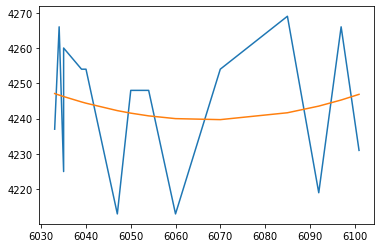

The correction error is 1814


In [2]:
X = [6101,
     6097,
     6092,
     6085,
     6070,
     6060,
     6050,
     6054,
     6047,
     6040,
     6039,
     6035,
     6034,
     6035,
     6033]

Y = [4231, #1
     4266, #2
     4219, #3
     4269, #4
     4254, #5
     4213, #6
     4248, #7
     4248, #8
     4213, #9
     4254, #10
     4254, #11
     4260, #12
     4266, #13
     4225, #14
     4237, #15     
     ]

zipped_lists = zip(X, Y)
sorted_pairs = sorted(zipped_lists)

tuples = zip(*sorted_pairs)
x, y = [list(tuple) for tuple in  tuples]

x = np.array(x).reshape((-1, 1))

y = np.array(y)

x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

model = LinearRegression().fit(x_, y)
r_sq = model.score(x_, y)

print('\n')
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coefficients:', model.coef_)

y_pred = model.predict(x_)
print('predicted response:', y_pred, sep='\n')

plt.plot(x,y)
plt.plot(x,y_pred)
plt.show()

delta_error = X - y_pred
error = np.mean(delta_error)

print('The correction error is {:.0f}'.format(error))

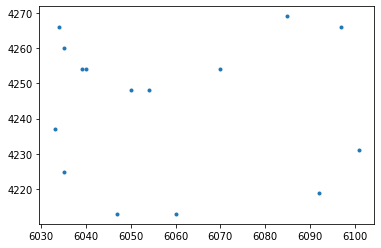

In [5]:
fig, axe = plt.subplots()
axe.plot(X, Y, '.')